# Stock Price Prediction using Recurrent Neural Networks

**Prroblem Statement**:

The goal of this project is to build a Recurrent Neural Network (RNN) that can predict the future stock price of Apple Inc. based on its past stock price history. 

Specifically, the RNN will take the stock price of the past 30 days as input and output the predicted stock price for the next day.

**Steps involved**:

> 1. Import necessary libraries such as numpy, pandas, matplotlib, scikit-learn, and tensorflow.keras.

> 2. Load the stock price data from a CSV file containing the historical data of Apple Inc.

> 3. Normalize the data using `MinMaxScaler` from scikit-learn.

> 4. Split the data into training and testing sets.

> 5. Create a function `create_dataset()` to prepare the data for the RNN, creating input and output pairs of data with a window size of 30 days. 

> 6. Build the RNN model using `Sequential()` and add two layers of SimpleRNN, each with 50 units, and 1 `Dense()` output layer.

> 7. Compile the model using `adam` optimizer and mean squared error (MSE) as the loss function.

> 8. Train the model using the training data for 100 epochs.

> 9. Use the trained model to predict the stock price for the testing data.

> 10. Reverse the normalization done earlier using `MinMaxScaler` to get the stock prices back to their original values.

> 11. Plot actual stock prices versus predicted stock prices over the testing period.

**Expected output**:

> The output of this project will be a plot of the actual stock prices versus the predicted stock prices over the testing period. 

> The plot will show whether the RNN model was successful in predicting the stock prices accurately. 

> The predicted stock prices can also be used to make investment decision.

**Problem Statement: Predict future stock prices for a given company using historical stock price data with RNNs.**

**Data**: You can obtain historical stock price data from sources like Yahoo Finance (https://finance.yahoo.com) or Alpha Vantage (https://www.alphavantage.co). For this example, let's assume we have downloaded the stock prices for a company, including the date, open, high, low, close, and volume information.

Using TensorFlow and Keras to create and train an RNN for predicting future stock prices:

**1. Import necessary libraries such as numpy, pandas, matplotlib, scikit-learn, and tensorflow.keras**: 

>The first step is to import all the necessary Python libraries and modules required for this project. Numpy and pandas are used for data manipulation, matplotlib is used for data visualization, scikit-learn is used for data preprocessing with `MinMaxScaler`, and tensorflow.keras is used to build and train the RNN model.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

**2. Load the stock price data from a CSV file containing the historical data of Apple Inc.**:

> The next step is to read the historical stock prices of Apple Inc. from a CSV file. 

> You can obtain historical stock price data from sources like Yahoo Finance (https://finance.yahoo.com) or Alpha Vantage (https://www.alphavantage.co). For this example, let's assume we have downloaded the stock prices for a company, including the date, open, high, low, close, and volume information.

> In this project, a CSV file named 'AAPL.csv' is used, which contains Apple's stock prices over time. The extracted data is stored in a Pandas DataFrame, and only the closing prices are selected for further analysis.

In [ ]:
# Load the dataset
data = pd.read_csv('AAPL.csv')
data = data['Close'].values.reshape(-1, 1)

**3. Normalize the data using `MinMaxScaler` from scikit-learn**:

> To prepare the data for the RNN model, the data is normalized using `MinMaxScaler` from scikit-learn. This technique scales all the values between 0 and 1 based on the provided `feature_range`, which in this example is (0,1)

In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

**4. Split the data into training and testing sets**:

> The next step involves splitting the data into training and testing sets. In this project, the first 80% of the data is used for training the RNN model, and the remaining 20% of data is used for testing the model.

In [ ]:
# Split the data into training and testing sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

**5. Create a function `create_dataset()` to prepare the data for the RNN**:

>In this step, we define a function called `create_dataset()` that prepares the input and output data for the RNN model. 

> It creates input and output data pairs with a fixed window size of 30 days for this project. 

> The `X` variable represents the input data, while `y` represents the output data. The function returns the input and output data as numpy arrays.

In [ ]:
# Prepare the data for the RNN
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 30
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

```
# Prepare the data for the RNN
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 30
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)
```

1. `# Prepare the data for the RNN`:
This is a comment that describes what the following code block does.

2. `def create_dataset(data, window_size):`:
This defines a function called `create_dataset()` that takes two arguments: `data` and `window_size`. The `data` argument will be the training or testing data, while `window_size` is used to create the input and output data pairs with a fixed window size.

3. `X, y = [], []`:
These two empty lists (`X` and `y`) will be used to store the input and output data pairs generated from the input data.

4. `for i in range(len(data) - window_size - 1):`:
This `for` loop iterates over the training or testing data `data`, calculating the input and output data pairs with a window size of `window_size`.

5. `X.append(data[i:(i + window_size), 0])`:
For each iteration of the `for` loop, the input data, `X`, is defined as the historical stock prices for the previous `window_size` days. This uses sliced subarrays of `data` where the row indices are i to i+window_size and it only contains one column which is the closing prices.

6. `y.append(data[i + window_size, 0])`:
The expected output or predicted stock prices are defined for each iteration by picking up the stock price of the next day after the window defined above, which is the `(i+ window_size, 0)` index in the `data` array.

7. `return np.array(X), np.array(y)`:
Finally, we convert the input and output data pairs stored in `X` and `y` into NumPy arrays and then return them.

8. `window_size = 30`:
This step defines a variable called `window_size`, which determines the number of past days used as input to predict the stock price for the following day. In this model, `window_size` is set to 30 days.

9. `X_train, y_train = create_dataset(train_data, window_size)`:
This line computes the input (`X_train`) and target output (`y_train`) for the training data using the `create_dataset()` function.

10. `X_test, y_test = create_dataset(test_data, window_size)`:
This line computes the input (`X_test`) and target output (`y_test`) for the testing data using the `create_dataset()` function.

11. `X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))`:
This line reshapes the `X_train` data as a 3D array using `np.reshape()`. This is required because the RNN model expects the input data in a 3D format where the dimensions are (number of samples, window size, number of features).

12. `X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))`:
This line reshapes the `X_test` data as a 3D array with the same method.

Overall, this block of code generates the training and testing data sets by calling the `create_dataset()` function with the training and testing data and window size as arguments. It reshapes the training and testing input data to a 3D array of a specific shape that the RNN model expects.
User : can you explain this : # Build the RNN model model = Sequential() model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

**6. Build the RNN model using `Sequential()`**:

> The next step is to build the RNN model. In this project, two `SimpleRNN` layers, each with 50 units, and one `Dense` output layer are added using `Sequential()`. 

> Dropout layers are also added after each `SimpleRNN` layer to prevent overfitting.

In [ ]:
# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

1. `model = Sequential()`: This line creates a sequential model in Keras where each layer is stacked on top of the previous layer.

2. `model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))`: This line adds a SimpleRNN layer with 50 units. The `input_shape` parameter is set to the shape of the training data with the number of time steps as the first dimension and the number of features as the second dimension. The `return_sequences` parameter is set to `True` to return the entire sequence of outputs at each time step.

3. `model.add(Dropout(0.2))`: This line adds a Dropout layer with a rate of 0.2 to prevent overfitting.

4. `model.add(SimpleRNN(units=50))`: This line adds another SimpleRNN layer with 50 units on top of the previous layer.

5. `model.add(Dropout(0.2))`: This line adds another Dropout layer with a rate of 0.2 to further prevent overfitting.

6. `model.add(Dense(units=1))`: This line adds a Dense layer with a single output unit to make the final prediction.

Overall, this RNN model is composed of two stacked SimpleRNN layers, each with 50 units, followed by two Dropout layers to prevent overfitting and a single output Dense layer. It takes in input of shape (number of time steps, number of features) and generates a single output at the end.

**7. Compile the model using `adam` optimizer and Mean Squared Error (MSE) as the loss function**:

> In this step, we compile the RNN model. We define the `adam` optimizer to update the weights of the RNN model to minimize `MSE` as the loss function. 


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

**8. Train the model using the training data**:

> The next step involves training the RNN model using the training data. We fit the model with the `X_train` and `y_train` data generated with the `create_dataset()` function. We train the RNN model with 100 epochs with a batch size of 32.

In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
6/6 [==============================] - 1s 11ms/step - loss: 0.2937
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.1716
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.1293
Epoch 4/100
6/6 [==============================] - 0s 11ms/step - loss: 0.1018
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0786
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0724
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0460
Epoch 8/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0559
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0497
Epoch 10/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0584
Epoch 11/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0362
Epoch 12/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0493
Epoch 13/100
6/6 [==============================]

**9. Use the trained model to predict the stock price for the testing data**:

> Using the `X_test` data generated with the `create_dataset()` function and the trained RNN model, we generate a series of predicted stock prices for Apple over each day of the testing data set.

In [ ]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 0s 195ms/step


**10. Reverse the normalisation done earlier using `MinMaxScaler`**:

> To get the predicted stock prices back to their original values from before normalization, we reverse the `MinMaxScaler` earlier applied to the data. 

> The predicted values are unscaled and transformed back to their original values.

In [ ]:
predictions = scaler.inverse_transform(predictions)

**11. Plot actual stock prices versus predicted stock prices**:

>The final step is to plot the actual stock prices obtained from the test data set against the predicted stock prices generated using the RNN model.

> We plot the actual stock prices above the predicted stock prices with different colors (blue and red, respectively) to visually compare the two. 

> The plot helps in visualizing and comparing actual versus predicted stock prices and provides an estimate of the RNN model's performance.

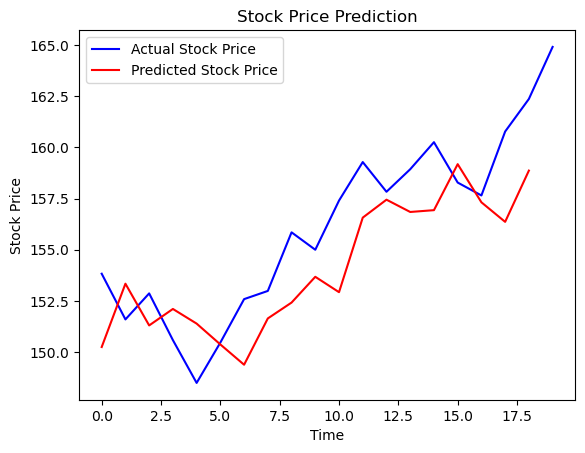

In [ ]:
# Plot the results
plt.plot(scaler.inverse_transform(test_data[window_size:]), color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Complete code

2023-04-02 19:13:52.551441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
6/6 [==============================] - 2s 12ms/step - loss: 0.1429
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0987
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0816
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.0787
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0672
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 0.0577
Epoch 7/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0560
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0437
Epoch 9/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0503
Epoch 10/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0454
Epoch 11/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0383
Epoch 12/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0375
Epoch 13/100
6/6 [==============================]

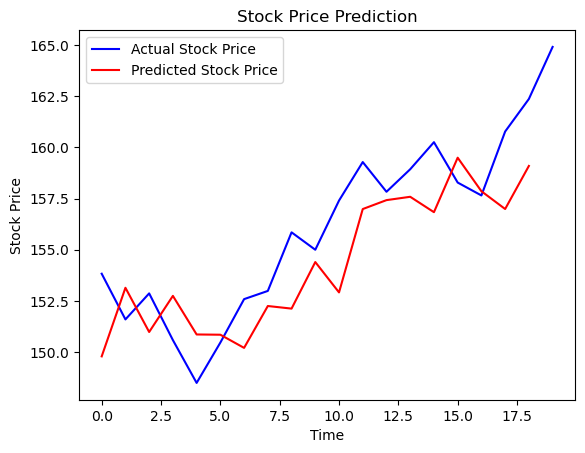

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

# Load the dataset
data = pd.read_csv('AAPL.csv')
data = data['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_data = data[:int(len(data)*0.8)]
test_data = data[int(len(data)*0.8):]

# Prepare the data for the RNN
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 30
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the results
plt.plot(scaler.inverse_transform(test_data[window_size:]), color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
